# Pandas
Librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar. **Nos permite procesar grandes volúmenes de información de forma eficiente**
- La estructura de datos principal es el **DataFrame**, que puede considerarse como una tabla 2D en memoria (como una hoja de cálculo, con nombres de column y etiquetas de fila).
- Muchas funciones disponibles en Excel están disponibles mediante programación, como crear tablas dinámicas, calcular columnas basadas en otras columnas, trazar gráficos, etc.
- Proporciona un alto rendimiento para manipular (unir, dividir, modificar...) grandes conjuntos de datos.

In [1]:
import pandas as pd

## Estructuras de datos en Pandas
La librería Pandas, de manera genérica, contiene las siguientes estructuras de datos:
- **Series:** Array de una dimensión
- **DaraFrame:** Se corresponde con una tabla de 2 dimensiones
- **Panel:** Similar a un diccionario de **DataFrame**

## Creación del objeto Series

In [9]:
# Creación de un objeto Series.
# Con "pd" accedemos a la clase "Series" y la podemos inicializar con una lista
s = pd.Series([2, 4, 6, 8, 10])
s
# En el resultado se ven dos columnas, en la primera se ve el índice y en la segunda, los elementos de la lista.
# Al final se ve "int64" que indica el tipo de datos de la serie

0     2
1     4
2     6
3     8
4    10
dtype: int64

In [16]:
# Creación de un objeto Series inicializandolo con un diccionario de Python
altura = {"Santiago":187, "Pedro": 178, "Julia": 170, "Ana": 165 } # Ej. diccionario
# Si genero un objeto "Serie" con altura, va a tomar como indice a la "clave" del diccionadio y como elemento al "valor"
s = pd.Series(altura)
s

Santiago    187
Pedro       178
Julia       170
Ana         165
dtype: int64

In [18]:
# Creación de un objeto Series inicializandolo con algunos de los elementos de un diccionario de Python
# Ahora para inicializar la "Serie" sólo con algnos valores, podemos aprovechar el concepto de indice para indicar con que indices
# se va a inicializar. Y va como 1er parámetro el diccionario. Como 2do parámetro
altura = {"Santiago":187, "Pedro": 178, "Julia": 170, "Ana": 165 }
s = pd.Series(altura, index=["Pedro", "Julia"])
s

Pedro    178
Julia    170
dtype: int64

In [19]:
# Creación de un objeto Series inicializandolo con un escalar
# Se crea un objeto "Series" donde todos sus elementos van a ser 30 y sus índices: test 1, 2 y 3 respectivamente
s = pd.Series(30, ["test1", "test2", "test3"])
s

test1    30
test2    30
test3    30
dtype: int64

## Acceso a los elementos de un objeto Series
Cada elemento en un objeto **Series** tiene un identificador único que se denomina **index label**

In [25]:
# Creación de un objeto Series. Agrego la lista de elementos y el índice
s = pd.Series( [2, 4, 6, 8], index=["num1", "num2", "num3", "num4"] )
s

num1    2
num2    4
num3    6
num4    8
dtype: int64

In [27]:
# Acreditamiento al tercer elemento del objeto a través de su índice "num3"
s["num3"]

6

In [28]:
# También se puede acceder al elemento por posición, es decir por su índice numérico
s[2]

6

In [29]:
# "loc" es la forma estándar de acceder a un elemento de un objeto Series por atributo
s.loc["num3"] # Es para acceder a través del índice

6

In [30]:
# "iloc" es la forma estándar de acceder a un elemento de un objeto Series por posición
s.iloc[2] # Es para acceder a través del índice numperico

6

In [31]:
# Accediendo al segundo y tercer elemento por posición
s.iloc[2:4]

num3    6
num4    8
dtype: int64

## Operaciónes aritméticas con Series

In [35]:
# Creación de un objeto Series
s = pd.Series([2,4,6,8,10])
s

0     2
1     4
2     6
3     8
4    10
dtype: int64

In [36]:
# Los objetos Series son similaares y compatibles con los Arrays de Numpy
import numpy as np
# Unfunc de Numpy para sumar los elementos de un Array
np.sum(s)

30

In [37]:
# El resto de operaciónes aritméticas de Numpy sobre Arrays también son posibles
# Más información al respecto en la Introducción a Numpy
s * 2

0     4
1     8
2    12
3    16
4    20
dtype: int64

## Representación gráfica de un objeto Series

In [38]:
# Creación de un objeto Series denominado Temperaturas
temperaturas = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9]
s = pd.Series(temperaturas, name="Temperaturas") # name="Temperaturas": Se nombra al objeto "Series" con nombre "Temperaturas"

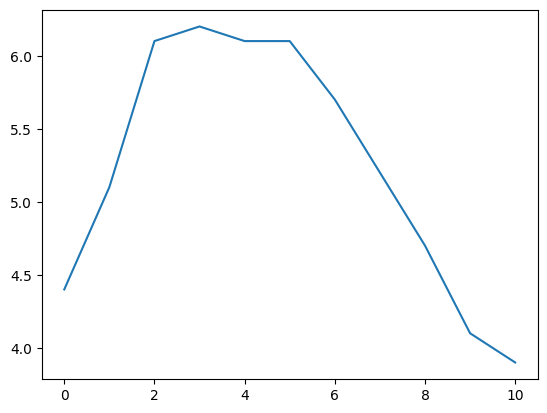

In [39]:
# Representación gráfica del objeto Series
%matplotlib inline
import matplotlib.pyplot as plt

s.plot()
plt.show()

## Creación de un objeto DataFrame
Es un objeto similar a "Series" pero con la diferencia que éste tiene 2 dimensiones como si fuese una tabla. Un **DataFrame** se inicializa con un diccionario donde cada "clave" contiene un objeto **Series**

In [42]:
# Creación de un DataFrame inicializandolo con un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
# Cuando una de las filas tiene menos elementos que los demás, se completa con un "NaN"
df = pd.DataFrame(personas) # Se castea el diccionario para convertirno en un DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [43]:
# Creación de un DataFrame inicializandolo con algunos elementos de un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
# Esta es otra forma de inicializarlo. Diciendole que inicie solo con las columnas indicadas y sólo con las filas (index) indicadas
df = pd.DataFrame(personas, columns=["altura", "peso"], index=["Ana", "Julia", "Santiago"])
df

,altura,peso
Ana,165,56
Julia,170,64
Santiago,187,84


In [45]:
# Creación de un DataFrme inicializandolo con una lista de listas de Python.
# Importante: Deben especificarse las columnas e indices por separado
valores = [
    [185, 4, 76],
    [170, 0, 65],
    [190, 1, 89]
]

df = pd.DataFrame(valores, columns=["altura", "hijos", "peso"], index=["Pedro", "Ana", "Juan"])
df

,altura,hijos,peso
Pedro,185,4,76
Ana,170,0,65
Juan,190,1,89


In [47]:
# Creación de un DataFrame inicializandolo con un diccionario de Python
personas = {
    "altura": {"Santiago":187, "Pedro": 178, "Julia":170, "Ana":165 },
    "peso": {"Santiago":87, "Pedro": 78, "Julia":70, "Ana":65 },
}
df = pd.DataFrame(personas)
df

,altura,peso
Santiago,187,87
Pedro,178,78
Julia,170,70
Ana,165,65


## Acceso a los elementos de un DataFrame

In [62]:
# Creación de un DataFrame inicializandolo con un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [49]:
# Acceso a los elementos de las columnas del DataFrame
df["peso"]

Ana         56
Julia       64
Pedro       99
Santiago    84
Name: peso, dtype: int64

In [50]:
# Obtiene un subconjunto del DataFrame original
df[ ["peso", "altura"] ]

,peso,altura
Ana,56,165
Julia,64,170
Pedro,99,178
Santiago,84,187


In [52]:
# Pueden combinarse los métodos anteriores con expresiones booleanas
# Devuelve los valores cuyos valores en la columna "peso" son mayores a 80
df[ df["peso"] > 80 ]

,peso,altura,hijos
Pedro,99,178,2.0
Santiago,84,187,NaN


In [54]:
# Pueden combinarse los métodos anteriores con expresiones booleanas
# Lo que está entre paréntesis devuelve los valores cuyos valores en la columna "peso" son mayores a 80
# "&" Esto equivale al operador "AND"
# Finalmente trae los elementos que cumplen con las dos condiciones
df[ (df["peso"] > 80) & (df["altura"] > 180) ]

,peso,altura,hijos
Santiago,84,187,NaN


## Acceso a los elementos de las filas del DataFrame

In [55]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [56]:
#
df.loc["Pedro"]

peso       99.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [57]:
df.iloc[2]

peso       99.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [58]:
df.iloc[1:3]

,peso,altura,hijos
Julia,64,170,3.0
Pedro,99,178,2.0


## Consulta avanzada de los elementos de un DataFrame

In [59]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [61]:
# query nos permite meter consultas en formato texto
df.query("altura >= 170 and peso > 80")

,peso,altura,hijos
Pedro,99,178,2.0
Santiago,84,187,NaN


## Copiar un DataFrame

In [63]:
# Creación de un DataFrame inicializandolo con un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [64]:
# Copia del DataFrame df en df_copy. IMPORTANTE: Al modificar un elemento del df_copy no se modifica df
# Cuando asignamos una variable a su objeto, estamos asignando una referencia, no una copia, es decir es el mismo objeto
# y cuando se modifica uno, se modifica el otro.
# Pero para realizar una copia, se hace
df_copy = df.copy()

## Modificación de un DataFrame

In [83]:
# Creación de un DataFrame inicializandolo con un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [69]:
# Añadir una nueva co, lumna al DataFrame.
# Se usa la misma sintaxis que para acceder a la columna. Y si no la encuentra, la crea. Y se le pueden asignar valores
df["cumpleaños"] = [1990, 1987, 1980, 1994]
df

,peso,altura,hijos,cumpleaños
Ana,56,165,NaN,1990
Julia,64,170,3.0,1987
Pedro,99,178,2.0,1980
Santiago,84,187,NaN,1994


In [73]:
# Añadir una nueva columna calculada al DataFrame. Significa añadir una nueva columna en mi conjunto de datos que se llame "años"
# Esto se hace realizando operaciones entre columnas
current_year = 2023 # Defino un entero con el año en el que estamos
df["años"] = current_year - df["cumpleaños"]
# Al entero (que es el año en el que estamos), le resto el conjunto de datos que se encuentra en la columna "cumpleaños".
# Entonces, uno a uno hace un Broadcasting donde al entero 2023, le resta el valor que le corresponde de la columna "cumpleaños".
# Esto en tiempos de ejecución demanda un ínfimo esfuerzo respecto a la implementación de un tradicional bucle
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,33
Julia,64,170,3.0,1987,36
Pedro,99,178,2.0,1980,43
Santiago,84,187,NaN,1994,29


In [77]:
# Añadir una nueva columna creando un DataFrame nuevo
df_mod = df.assign(mascotas = [1, 3, 0, 0])
df_mod
# Este DataFrame contiene columna "mascotas" porque es un DataFrame nuevo. Lo que devuelve es una COPIA

,peso,altura,hijos,cumpleaños,años,mascotas
Ana,56,165,NaN,1990,33,1
Julia,64,170,3.0,1987,36,3
Pedro,99,178,2.0,1980,43,0
Santiago,84,187,NaN,1994,29,0


In [78]:
# Si muestro el DataFrame orifinal no tiene la columna "mascotas"
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,33
Julia,64,170,3.0,1987,36
Pedro,99,178,2.0,1980,43
Santiago,84,187,NaN,1994,29


## Eliminar columnas

In [79]:
# Eliminar una columna existente del DataFrame. IMPORTANTE: Cuando se elimina, no se recupera
del df["peso"]

In [80]:
# Eliminar una columna existente devolviendo una copia del DataFrame resultante
df_mod = df.drop(["hijos"], axis=1)
df_mod

,altura,cumpleaños,años
Ana,165,1990,33
Julia,170,1987,36
Pedro,178,1980,43
Santiago,187,1994,29


In [81]:
# Si consulto el DataFrame original, obtengo todas las columnas, incluyendo la de "hijos"
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,33
Julia,170,3.0,1987,36
Pedro,178,2.0,1980,43
Santiago,187,NaN,1994,29


In [82]:
# Los métodos del DataFrame tambien pueden ser consultados con dir(df). Recordar que los que están con "__" guión bajo no se usan porque son métodos internos
# los demás si.

## Evaluación de expresiones sobre un DataFrame
Evaluar un Dataframe y guardar un DataFrame en disco. El 100% de las veces usamos un **DataFrame** que tenemos que tenemos que usar en muchas ocaciones para tratar grandes volúmenes de datos y no lo tratamos todo el mismo día.
Sino que se almacena para procesarlo en otro momento

In [96]:
# Creación de un DataFrame inicializandolo con un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [89]:
# Evaluar una función sobre una coluna del DataFrame
df.eval("altura / 2")

Ana         82.5
Julia       85.0
Pedro       89.0
Santiago    93.5
dtype: float64

In [91]:
# Asignar el valor resultante como una nueva columna
# Crea una nueva columna llamada "media_altura" y a cada celda le asigna el valor de la columna "altura", dividido 2.
# "inplance" significa que va a meter los datos en el DataFrame original
df.eval("media_altura = altura / 2", inplace=True)
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,99,178,2.0,89.0
Santiago,84,187,NaN,93.5


In [92]:
# Evaluar una función utilizando una variable local
max_altura = 180 # Defino una variable local
# Luego lo que hace es comparar la altura con "max_altura" (se usa el namespace "@" para que acceda a la variable)
# Y retorna un booleano
df.eval("altura > @max_altura")

Ana         False
Julia       False
Pedro       False
Santiago     True
dtype: bool

In [94]:
# Aplicar una función externa a una columna del DataFrame.
# Defino la funcion
def func(x):
  return x + 2

# Para la columna "peso", le aplico el método "apply" donde le paso la referencia a la funcion llamada "func".
# Entonces para cada valor de "peso", le va a sumar 2.
# Esto devuelve una copia, no modifica el DataFrame original
df["peso"].apply(func)

Ana          58
Julia        66
Pedro       101
Santiago     86
Name: peso, dtype: int64

In [95]:
# Si se muestra el original, no se ve la última modificación
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,99,178,2.0,89.0
Santiago,84,187,NaN,93.5


## Guardar y Cargar el DataFrame

In [97]:
# Creación de un DataFrame inicializandolo con un diccionario de objetos Series
personas = {
    "peso": pd.Series([84, 99, 56, 64], ["Santiago", "Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago":187,"Pedro":178,"Julia":170,"Ana":165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}
df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN


In [100]:
# Guardar el DataFrame en disco como CSV, HTML y JSON
df.to_csv("df_personas.csv")
df.to_html("df_personas.html") # Lo muestra como una tablita html
df.to_json("df_personas.json")

In [101]:
# Cargar el DataFrame en Jupyter
df2 = pd.read_csv("df_personas.csv")

In [102]:
df2

,Unnamed: 0,peso,altura,hijos
0,Ana,56,165,NaN
1,Julia,64,170,3.0
2,Pedro,99,178,2.0
3,Santiago,84,187,NaN


In [104]:
# Cargar el DataFrame con la primera columna correctamente asignada
# Para que cuando lea un csv que le metemos de afuera y no transforme la primera columna como "Unnamed: 0", hay que
# indicarle un index_col=0
df2 = pd.read_csv("df_personas.csv", index_col=0)
df2

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,99,178,2.0
Santiago,84,187,NaN
